In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date

In [2]:
start = '2010-01-01'
end = date.today().strftime("%Y-%m-%d")

df = yf.download('AAPL', start=start, end=end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461976,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473149,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370186,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358409,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400681,447610800


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-14,213.850006,215.169998,211.300003,212.490005,212.490005,70122700
2024-06-17,213.369995,218.949997,212.720001,216.669998,216.669998,93728300
2024-06-18,217.589996,218.630005,213.000000,214.289993,214.289993,79943300
2024-06-20,213.929993,214.240005,208.850006,209.679993,209.679993,86172500
2024-06-21,210.389999,211.889999,207.110001,207.490005,207.490005,241805100


In [4]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461976,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473149,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370186,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358409,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400681,447610800


In [5]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


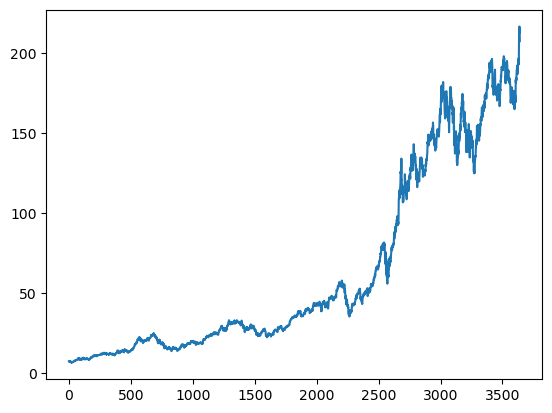

In [6]:
plt.plot(df.Close)

In [7]:
ma30 = df.Close.rolling(30).mean()
ma30

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3636    192.388333
3637    193.498000
3638    194.583999
3639    195.493332
3640    196.318332
Name: Close, Length: 3641, dtype: float64

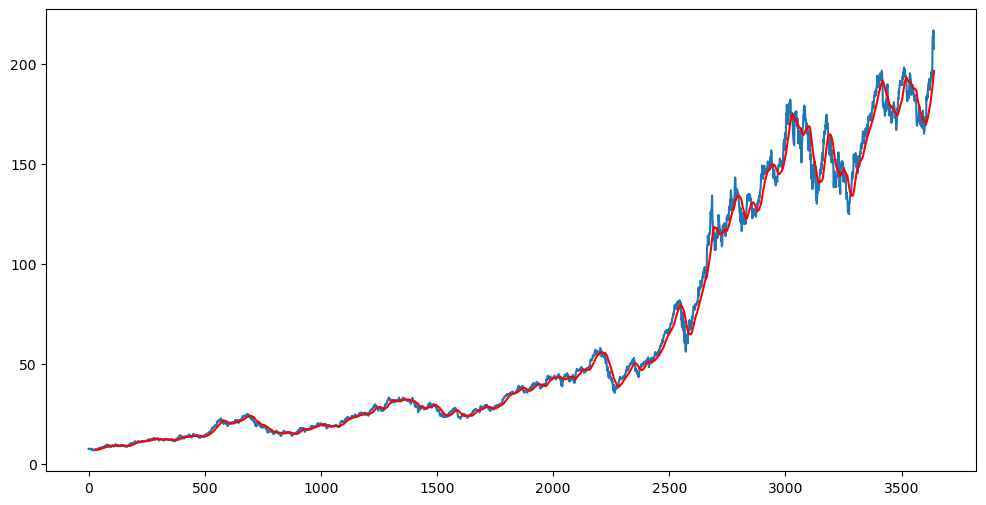

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma30, 'r')

In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3636    181.3998
3637    181.6215
3638    181.8227
3639    181.9953
3640    182.1529
Name: Close, Length: 3641, dtype: float64

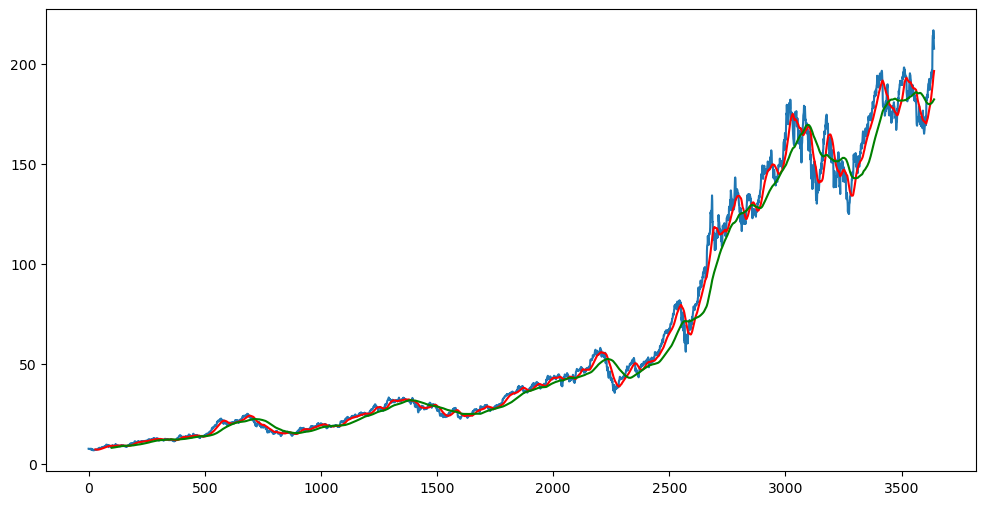

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma30, 'r')
plt.plot(ma100, 'g')

In [11]:
# Chia tập dữ liệu thành training_set và testing_set
n1 = int(len(df)*0.80)
n2 = int(len(df)*0.10)

data_training = pd.DataFrame(df['Close'][0:n1])
data_validating = pd.DataFrame(df['Close'][n1:(n1+n2)])
data_testing = pd.DataFrame(df['Close'][(n1+n2):])

print(data_training.shape)
print(data_validating.shape)
print(data_testing.shape)


(2912, 1)
(364, 1)
(365, 1)


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [13]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00551184],
       [0.00560471],
       [0.00474882],
       ...,
       [0.99887563],
       [0.98327379],
       [0.97069389]])

In [14]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)    

In [15]:
x_train.shape

(2812, 100, 1)

In [16]:
days = data_training.tail(100)
data_validating = pd.concat([days, data_validating], ignore_index=True)

In [17]:
data_valiadating_array = scaler.fit_transform(data_validating)
data_valiadating_array

array([[0.        ],
       [0.07204868],
       [0.05514095],
       [0.08530082],
       [0.07113478],
       [0.11622236],
       [0.14028941],
       [0.12795129],
       [0.06351864],
       [0.05529318],
       [0.10708301],
       [0.09413558],
       [0.05681639],
       [0.06443254],
       [0.0738766 ],
       [0.07661842],
       [0.05392233],
       [0.088195  ],
       [0.10114242],
       [0.1453161 ],
       [0.15003807],
       [0.17578069],
       [0.21325211],
       [0.25346536],
       [0.22665661],
       [0.27524743],
       [0.23869002],
       [0.2763138 ],
       [0.27113488],
       [0.28149273],
       [0.25514092],
       [0.26108151],
       [0.23731917],
       [0.2735721 ],
       [0.27966492],
       [0.27463824],
       [0.26230012],
       [0.2607768 ],
       [0.23000773],
       [0.2464584 ],
       [0.17501902],
       [0.17882721],
       [0.20380817],
       [0.21096736],
       [0.15978673],
       [0.14546845],
       [0.09763894],
       [0.131

In [18]:
x_val = []
y_val = []

for i in range(100, data_valiadating_array.shape[0]):
    x_val.append(data_valiadating_array[i-100:i])
    y_val.append(data_valiadating_array[i, 0])

x_val, y_val = np.array(x_val), np.array(y_val)    

In [19]:
x_val.shape

(364, 100, 1)

In [20]:
# ML Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import warnings

tf.get_logger().setLevel('ERROR')

warnings.filterwarnings('ignore')

# Define your model
model = Sequential([
    GRU(256, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    Dropout(0.3), 
    GRU(128, return_sequences=True),
    Dropout(0.3),
    GRU(64, return_sequences=True),
    Dropout(0.3),
    GRU(32), 
    Dropout(0.3),
    Dense(1, activation='tanh')
])

model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [21]:
early_stopping = EarlyStopping(monitor='val_loss', patience=300, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=50, min_lr=1e-6)

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 100, 256)       │       198,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 100, 128)       │       148,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 100, 64)        │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 393,825 (1.50 MB)

 Trainable params: 393,825 (1.50 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 26s 172ms/step - loss: 0.0213 - mean_absolute_error: 0.0786 - val_loss: 0.0098 - val_mean_absolute_error: 0.0803 - learning_rate: 0.0010
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 16s 182ms/step - loss: 0.0021 - mean_absolute_error: 0.0306 - val_loss: 0.0077 - val_mean_absolute_error: 0.0707 - learning_rate: 0.0010
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 30s 339ms/step - loss: 0.0013 - mean_absolute_error: 0.0248 - val_loss: 0.0083 - val_mean_absolute_error: 0.0736 - learning_rate: 0.0010
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 36s 415ms/step - loss: 0.0011 - mean_absolute_error: 0.0230 - val_loss: 0.0101 - val_mean_absolute_error: 0.0801 - learning_rate: 0.0010
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 30s 345ms/step - loss: 0.0011 - mean_absolute_error: 0.0217 - val_loss: 0.0086 - val_mean_absolute_error: 0.0744 - learning_rate: 0.0010
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 13s 153ms/step - loss: 0.0010 - mean_absolute_error: 0.0215 - val_loss: 0.0067 - 

In [24]:
model.save('D:\DecisionSupportSystem\Project\Models\AAPL_Model14___Stack-VMD-GRU.keras')

In [25]:
data_testing.head()

,Close
3276,130.149994
3277,130.729996
3278,133.490005
3279,133.410004
3280,134.759995


In [26]:
past_100_days = data_validating.tail(100)

In [27]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [28]:
input_data = scaler.fit_transform(final_df)
input_data

array([[5.23840713e-01],
       [5.40425593e-01],
       [5.36061063e-01],
       [5.07365050e-01],
       [4.64266339e-01],
       [4.60556447e-01],
       [4.63829803e-01],
       [4.91107489e-01],
       [4.21167461e-01],
       [3.96726761e-01],
       [3.69776393e-01],
       [3.51336651e-01],
       [3.59410906e-01],
       [3.35951996e-01],
       [3.21985834e-01],
       [3.37588757e-01],
       [3.21222145e-01],
       [3.52973245e-01],
       [4.19094331e-01],
       [3.14457165e-01],
       [3.30496458e-01],
       [2.98417873e-01],
       [2.80196398e-01],
       [3.21440247e-01],
       [3.47845027e-01],
       [3.13147890e-01],
       [3.02455083e-01],
       [2.77250361e-01],
       [2.80960253e-01],
       [2.91762110e-01],
       [2.70812867e-01],
       [1.90507352e-01],
       [1.43807966e-01],
       [1.90180033e-01],
       [2.30005555e-01],
       [2.33278744e-01],
       [2.22694988e-01],
       [1.64429890e-01],
       [1.68030565e-01],
       [1.52318591e-01],


In [29]:
input_data.shape

(465, 1)

In [30]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)    

In [31]:
print(x_test.shape)
print(y_test.shape)

(365, 100, 1)
(365,)


In [32]:
# Making predictions
y_predicted = model.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 273ms/step


In [33]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [34]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)
mape = (np.abs((y_test - y_predicted) / y_test).mean()) * 100
r2 = r2_score(y_test, y_predicted)

# Đánh giá mô hình
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')
print(f'R²: {r2}')

MAE: 2.269637016400898
MSE: 9.057898711390179
RMSE: 3.009634315226715
MAPE: 1.3034780779604425%
R²: 0.9632287096753895


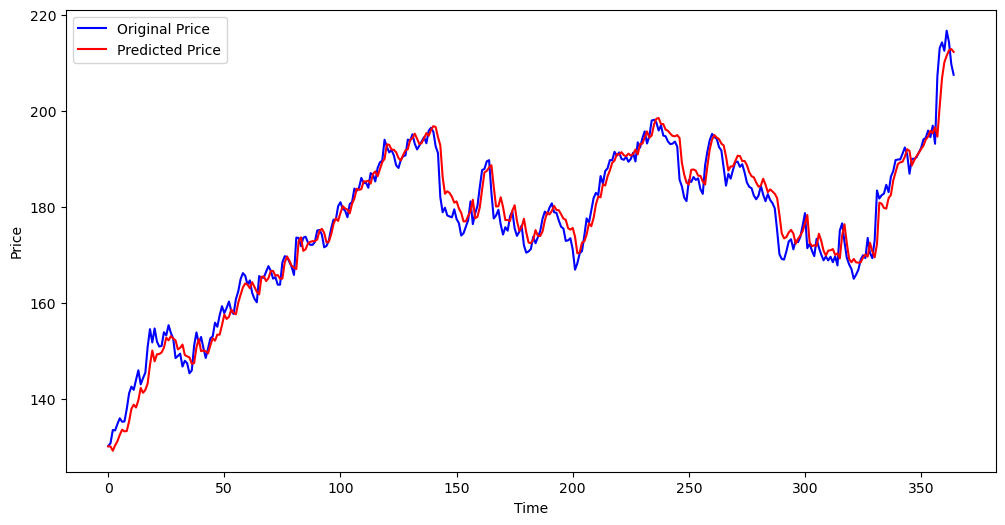

In [35]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()